<a href="https://colab.research.google.com/github/Umaporn19/Project/blob/main/Train_id2_id6_id8_id10_Test_id12_100_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # เชื่อมเข้ากับ Drive
drive.mount('/content/drive')  # คลิกที่ลิงก์ -> เลือก E-mail -> ลงชื่อเข้าใช้ -> ก็อปโค้ด -> นำกลับมาวางในช่องว่าง -> กด enter

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
import pandas as pd

## Load model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
batch_size = 20
width = 150
height = 150
epochs = 100
NUM_TRAIN = 100
NUM_TEST = 100
dropout_rate = 0.2
input_shape = (height, width, 3)

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

In [ ]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# Higher the number, the more complex the model is.
from efficientnet import EfficientNetB0 as Net
from efficientnet import center_crop_and_resize, preprocess_input

In [ ]:
# loading pretrained conv base model
# โหลดโมเดล มาโดยตัด output ของโมเดลออก เเต่ยังใช้ input อันเดิม
# เเละโหลด weight ของโมเดล มาด้วยที่ชื่อว่า imagenet
conv_base = Net(weights='imagenet', include_top=False, input_shape=input_shape)

In [ ]:
conv_base.summary() #ดู Summary

## import data

In [ ]:
import pandas as pd
import shutil

In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/data/id_all.csv')
df

,Unnamed: 0,Path_Name,id,Part
0,0,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
1,1,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
2,2,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
3,3,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
4,4,/content/drive/My Drive/id/id2/Base/p11/dis1.7...,id2,p11
...,...,...,...,...
243523,243523,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243524,243524,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243525,243525,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09
243526,243526,/content/drive/My Drive/id/id12/Severe/p09/dis...,id12,p09


## แบ่งข้อมูล Train & Test

In [ ]:
train = df[df['Unnamed: 0'].between(0,190079)]
test = df[df['Unnamed: 0'].between(190080,243527)]

In [ ]:
DATA_PATH = "/content/drive/My Drive/id"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/id/train
/content/drive/My Drive/id/test


## Train 

In [ ]:
# Train ด้วย ImageDataGenerator ของ Keras ซึ่งจะเพิ่มข้อมูลเสริมระหว่างการฝึกเพื่อลดโอกาสเกิด overfitting
#overfitting เกิดจากข้อมูลที่ซับซ้อนกันเกินไป
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Part',
        target_size=(height, width),
        batch_size=batch_size)

test_generator = test_datagen.flow_from_dataframe(
        dataframe = test,
        directory = test_dir,
        x_col = 'Path_Name',
        y_col = 'Part',
        target_size=(height, width),
        batch_size=batch_size)

Found 190080 validated image filenames belonging to 15 classes.
Found 53448 validated image filenames belonging to 15 classes.


## load model

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_500.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_500.h5')
height = width = model.input_shape[1]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 5, 5, 1280)       4049564   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 15)                19215     
                                                                 
Total params: 4,068,779
Trainable params: 19,215
Non-trainable params: 4,049,564
_________________________________________________________________


## unfreeze

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'multiply_15':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers after freezing the conv base: 8


In [ ]:
model.summary()

## Training

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=test_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
      use_multiprocessing=True,
      workers=4)

<ipython-input-19-6ef5d1e0375e>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
5/5 [==============================] - 42s 7s/step - loss: 6.7432 - acc: 0.1900 - val_loss: 4.6898 - val_acc: 0.2600
Epoch 2/100
5/5 [==============================] - 36s 7s/step - loss: 3.3817 - acc: 0.3600 - val_loss: 4.1140 - val_acc: 0.2800
Epoch 3/100
5/5 [==============================] - 34s 7s/step - loss: 3.7789 - acc: 0.2700 - val_loss: 4.3833 - val_acc: 0.2600
Epoch 4/100
5/5 [==============================] - 34s 7s/step - loss: 2.5640 - acc: 0.4800 - val_loss: 4.0162 - val_acc: 0.3900
Epoch 5/100
5/5 [==============================] - 34s 7s/step - loss: 2.9569 - acc: 0.4100 - val_loss: 3.5001 - val_acc: 0.3100
Epoch 6/100
5/5 [==============================] - 35s 6s/step - loss: 2.5089 - acc: 0.4900 - val_loss: 3.7797 - val_acc: 0.2800
Epoch 7/100
5/5 [==============================] - 34s 7s/step - loss: 2.6184 - acc: 0.5200 - val_loss: 5.7910 - val_acc: 0.2900
Epoch 8/100
5/5 [==============================] - 29s 5s/step - loss: 2.6068 - acc: 0.5100 - val

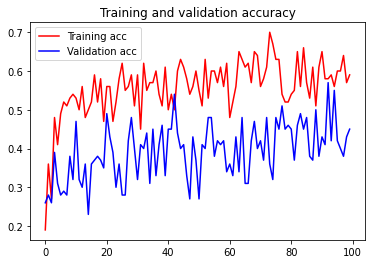

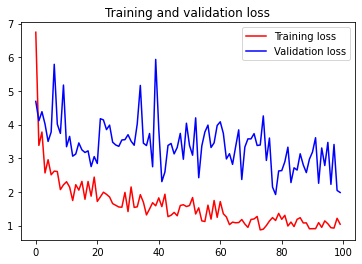

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'r', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'r', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## save model

In [ ]:
os.makedirs('/content/drive/MyDrive/Model', exist_ok=True)
model.save('/content/drive/My Drive/Model/Train_id2_id6_id8_id10_Test_id12_100_Unfreeze.h5')

In [ ]:
from google.colab import files